# Importer les bibliothèques

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Charger les données

In [57]:
df = pd.read_csv("nba_data_processed.csv")
df.head()


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4


# Nettoyage et préparation

In [58]:
print(f"Rows after removing duplicates: {len(df)}")
print(f"Duplicate rows: {df.duplicated().sum()}")

# Supprimer les lignes dupliquées
df = df.drop_duplicates()

print(f"Rows after removing duplicates: {len(df)}")

Rows after removing duplicates: 649
Duplicate rows: 24
Rows after removing duplicates: 625


In [59]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Player     1
Pos        1
Age        1
Tm         1
G          1
GS         1
MP         1
FG         1
FGA        1
FG%        5
3P         1
3PA        1
3P%       31
2P         1
2PA        1
2P%       10
eFG%       5
FT         1
FTA        1
FT%       53
ORB        1
DRB        1
TRB        1
AST        1
STL        1
BLK        1
TOV        1
PF         1
PTS        1
dtype: int64


In [60]:
# Remplacer les valeurs manquantes par la moyenne de chaque colonne
df = df.fillna(df.mean(numeric_only=True))
# (Re)afficher pour confirmation
print("\naprès suppression :",df.isnull().sum())



après suppression : Player    1
Pos       1
Age       0
Tm        1
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64


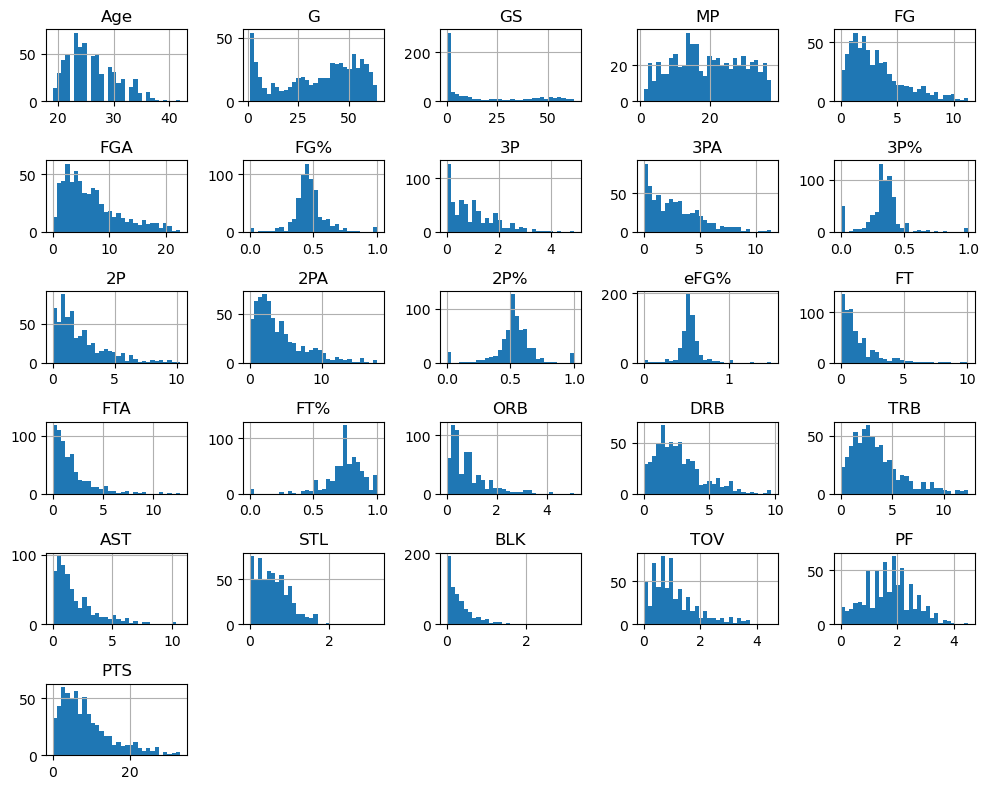

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Matrice de correlation 

## 1

          Age         G        GS        MP       TOV        FT        FG  \
Age  1.000000  0.024648  0.079722  0.177994  0.109737  0.078340  0.094160   
G    0.024648  1.000000  0.635639  0.608788  0.445291  0.394427  0.498225   
GS   0.079722  0.635639  1.000000  0.801791  0.656357  0.622796  0.734636   
MP   0.177994  0.608788  0.801791  1.000000  0.775150  0.717691  0.876971   
TOV  0.109737  0.445291  0.656357  0.775150  1.000000  0.790095  0.839313   
FT   0.078340  0.394427  0.622796  0.717691  0.790095  1.000000  0.859315   
FG   0.094160  0.498225  0.734636  0.876971  0.839313  0.859315  1.000000   
PTS  0.108828  0.491093  0.726950  0.876380  0.842088  0.898549  0.991059   

          PTS  
Age  0.108828  
G    0.491093  
GS   0.726950  
MP   0.876380  
TOV  0.842088  
FT   0.898549  
FG   0.991059  
PTS  1.000000  
Corrélation avec PTS :
PTS    1.000000
FG     0.991059
FT     0.898549
MP     0.876380
TOV    0.842088
GS     0.726950
G      0.491093
Age    0.108828
Name: PTS, 

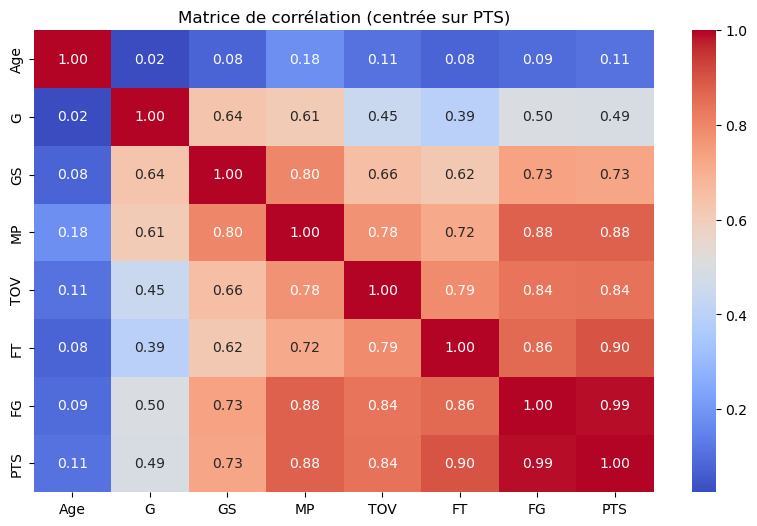

In [113]:
# Colonnes numériques à garder pour l'analyse
colonnes_numeriques = ['Age','G','GS', 'MP','TOV','FT', 'FG','PTS']


# Filtrer les colonnes
data_numeric = df[colonnes_numeriques].dropna()

# Matrice de corrélation
correlation_matrix = data_numeric.corr()
print(correlation_matrix)
# Afficher la corrélation par rapport à PTS%
print("Corrélation avec PTS :")
print(correlation_matrix['PTS'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (centrée sur PTS)")
plt.show()


## 2

           GS        MP       TOV        FT        FG       PTS
GS   1.000000  0.801791  0.656357  0.622796  0.734636  0.726950
MP   0.801791  1.000000  0.775150  0.717691  0.876971  0.876380
TOV  0.656357  0.775150  1.000000  0.790095  0.839313  0.842088
FT   0.622796  0.717691  0.790095  1.000000  0.859315  0.898549
FG   0.734636  0.876971  0.839313  0.859315  1.000000  0.991059
PTS  0.726950  0.876380  0.842088  0.898549  0.991059  1.000000
Corrélation avec PTS :
PTS    1.000000
FG     0.991059
FT     0.898549
MP     0.876380
TOV    0.842088
GS     0.726950
Name: PTS, dtype: float64


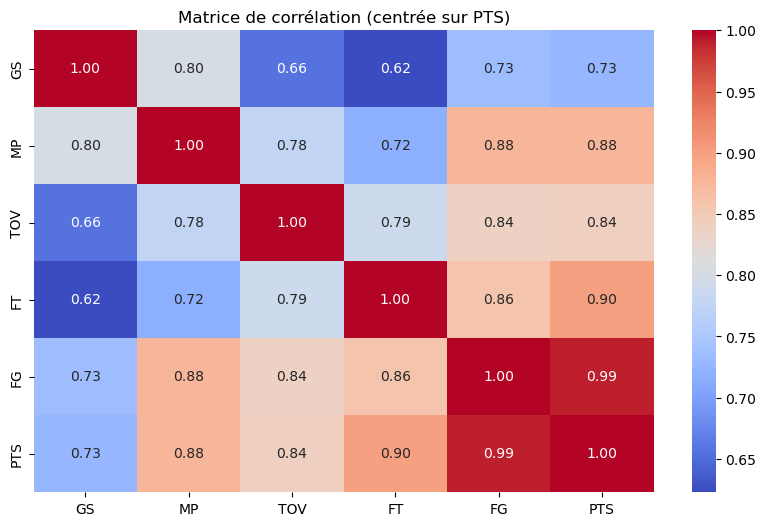

In [114]:
# Colonnes numériques à garder pour l'analyse
colonnes_numeriques = [ 'GS', 'MP','TOV','FT', 'FG','PTS']

# Filtrer les colonnes
data_numeric = df[colonnes_numeriques].dropna()

# Matrice de corrélation
correlation_matrix = data_numeric.corr()
print(correlation_matrix)
# Afficher la corrélation par rapport à PTS%
print("Corrélation avec PTS :")
print(correlation_matrix['PTS'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation (centrée sur PTS)")
plt.show()


## Analyse 


# VIF

In [116]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sélection des variables explicatives
X_vif = df[[ 'GS', 'MP','TOV','FT', 'FG']]

# Supprimer les lignes contenant des NaN ou des inf
X_vif = X_vif.replace([np.inf, -np.inf], np.nan).dropna()

# Ajout de la constante pour statsmodels
X_vif_const = add_constant(X_vif)

# Calcul du VIF
vif = pd.DataFrame()
vif["Feature"] = X_vif_const.columns
vif["VIF"] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print("Variance Inflation Factors (VIF):\n")
print(vif)


Variance Inflation Factors (VIF):

  Feature       VIF
0   const  7.386440
1      GS  2.844373
2      MP  5.933031
3     TOV  3.748191
4      FT  4.235352
5      FG  8.811105


# Séparer les données en train et test

In [118]:
# Sélection des colonnes pertinentes
X = df[[ 'GS', 'MP','TOV','FT', 'FG']]
y = df['PTS']

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Régression linéaire multiple

In [121]:
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction
y_pred = model.predict(X_test)


# Évaluation du modèle

In [122]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# Affichage des résultats du modèle
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Prédictions déjà faites
# y_pred = model.predict(X_test)

# Métriques d'évaluation
print("R² Score (Accuracy):", r2_score(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))

# Coefficients sous forme de DataFrame
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coeff_df)


Model Coefficients: [-0.00811325  0.05760015 -0.14114568  0.84347501  2.21365376]
Model Intercept: -0.329345708709031
R² Score (Accuracy): 0.9906751732628261
Mean Squared Error (MSE): 0.37818012890136965
Root Mean Squared Error (RMSE): 0.6149635183499665
Mean Absolute Error (MAE): 0.43690629473862147

Model Coefficients:
     Coefficient
GS     -0.008113
MP      0.057600
TOV    -0.141146
FT      0.843475
FG      2.213654


# Fonction de prédiction

In [123]:
# Récupérer les coefficients et l'intercept du modèle entraîné
intercept = model.intercept_
coefs = model.coef_

# Fonction prédictive générique
def predict_y(X_values):
    """
    Calcule la prédiction Y à partir d'une liste ou d'un tableau de variables explicatives X_values
    """
    if len(X_values) != len(coefs):
        raise ValueError(f"Longueur attendue : {len(coefs)} valeurs (reçues : {len(X_values)})")
    
    Y = intercept + sum(c * x for c, x in zip(coefs, X_values))
    return Y


In [ ]:
# Exemple avec une observation 
valeurs = [77, 32, 10, 3, 8]  
#[ 'GS', 'MP','TOV','FT', 'FG']
prediction = predict_y(valeurs)

print("Prédiction de PTS :", prediction)


Prédiction de PTS : 19.717337038682174
